In [1]:
# 필요 라이브러리 불러오기
import numpy as np          # 수치 데이터 연산
import pandas as pd         # 데이터프레임 조작


In [2]:
# 데이터 로드
df = pd.read_csv('Downloads/CVD_cleaned.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [3]:
# 데이터 프레임 상위 5개의 행 확인
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
# 통계량 확인
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
# 컬럼 별 결측치 확인하기
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
# 대상 컬럼 리스트
one_hot_columns = [
    'General_Health', 'Checkup', 'Diabetes', 'Exercise', 
    'Skin_Cancer', 'Other_Cancer', 'Age_Category', 
    'Depression', 'Arthritis', 'Sex', 'Smoking_History'
]

# 원-핫 인코딩 진행
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# 결과 확인
df.head()


,Heart_Disease,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,No,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,Yes,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,No,163.0,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Yes,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,No,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,...,0,0,0,0,0,1,0,0,1,1


In [7]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# Heart_Disease 컬럼 레이블 인코딩
df['Heart_Disease'] = label_encoder.fit_transform(df['Heart_Disease'])

# 결과 확인
df[['Heart_Disease']].head()

,Heart_Disease
0,0
1,1
2,0
3,1
4,0


In [8]:
from sklearn.model_selection import train_test_split

# 입력 데이터(features)와 출력 데이터(target) 분리
X = df.drop(columns=['Heart_Disease'])  # 'Heart_Disease'를 타겟 변수로 사용
y = df['Heart_Disease']                 # 타겟 변수 정의

# 데이터를 학습 데이터셋과 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,                                               
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# 결과 확인
print("학습 데이터셋 크기:", X_train.shape, y_train.shape)
print("테스트 데이터셋 크기:", X_test.shape, y_test.shape)

학습 데이터셋 크기: (247083, 37) (247083,)
테스트 데이터셋 크기: (61771, 37) (61771,)


In [44]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 대상 컬럼 정의
scaling_columns = [
    'Height_(cm)', 'Weight_(kg)', 'BMI', 
    'Alcohol_Consumption', 'Fruit_Consumption', 
    'Green_Vegetables_Consumption', 'FriedPotato_Consumption'
]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 학습 데이터에서 스케일링 대상 컬럼만 변환
X_train_scaled = X_train.copy()
X_train_scaled[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])

# 테스트 데이터에서 동일한 스케일링 적용
X_test_scaled = X_test.copy()
X_test_scaled[scaling_columns] = scaler.transform(X_test[scaling_columns])

# 결과 확인
print("스케일링된 학습 데이터 (일부):\n", X_train_scaled[scaling_columns].head().to_string(index=False))
print("\n스케일링된 테스트 데이터 (일부):\n", X_test_scaled[scaling_columns].head().to_string(index=False))

스케일링된 학습 데이터 (일부):
  Height_(cm)  Weight_(kg)      BMI  Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption
    0.626667     0.287649 0.202639             0.000000           0.750000                      0.062500                  0.03125
    0.426667     0.160742 0.187263             0.000000           0.133333                      0.000000                  0.00000
    0.526667     0.270713 0.248422             0.133333           0.066667                      0.093750                  0.12500
    0.480000     0.228410 0.236259             0.033333           0.033333                      0.031250                  0.09375
    0.646667     0.439922 0.326104             0.000000           0.000000                      0.117188                  0.15625

스케일링된 테스트 데이터 (일부):
  Height_(cm)  Weight_(kg)      BMI  Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption
    0.526667     0.143806 0.113712             1

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 시드 고정
np.random.seed(42)
tf.random.set_seed(42)

# 모델 생성
model = Sequential()

# 모델 구성
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제에 적합한 sigmoid 활성화 함수

# 모델 요약
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,217 (20.38 KB)

 Trainable params: 5,217 (20.38 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 모델 컴파일
model.compile(
    optimizer='adam',                    # Adam 옵티마이저 사용
    loss='binary_crossentropy',          # 이진 분류를 위한 손실 함수
    metrics=['accuracy']                 # 평가 지표
)


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

# early stopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',    # 검증 손실(val_loss)을 기준으로 모니터링
    patience=5,            # 개선되지 않는 에폭 수 (5회 연속 개선되지 않으면 학습 중단)
    restore_best_weights=True  # 가장 성능이 좋은 모델의 가중치를 복원
)

# 모델 학습
history = model.fit(
    X_train_scaled,        # 학습 데이터 (입력)
    y_train,               # 학습 데이터 (타겟)
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    epochs=50,            # 최대 학습 반복 횟수
    batch_size=32,         # 배치 크기
    callbacks=[early_stopping],  # 얼리 스탑핑 콜백 추가
    verbose=1              # 학습 과정 출력 (1: 상세 출력)
)


Epoch 1/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 3s 406us/step - accuracy: 0.9162 - loss: 0.2889 - val_accuracy: 0.9185 - val_loss: 0.2248
Epoch 2/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 397us/step - accuracy: 0.9195 - loss: 0.2375 - val_accuracy: 0.9185 - val_loss: 0.2255
Epoch 3/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 394us/step - accuracy: 0.9195 - loss: 0.2352 - val_accuracy: 0.9185 - val_loss: 0.2261
Epoch 4/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 393us/step - accuracy: 0.9195 - loss: 0.2337 - val_accuracy: 0.9185 - val_loss: 0.2253
Epoch 5/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 397us/step - accuracy: 0.9195 - loss: 0.2327 - val_accuracy: 0.9185 - val_loss: 0.2239
Epoch 6/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 3s 447us/step - accuracy: 0.9194 - loss: 0.2310 - val_accuracy: 0.9185 - val_loss: 0.2236
Epoch 7/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 397us/step - accuracy: 0.9195 - loss: 0.2300 - val_accuracy: 0.9185 - val_loss: 0.2227
Epoch 8/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 2s 395us/step - accuracy: 0.9196 -

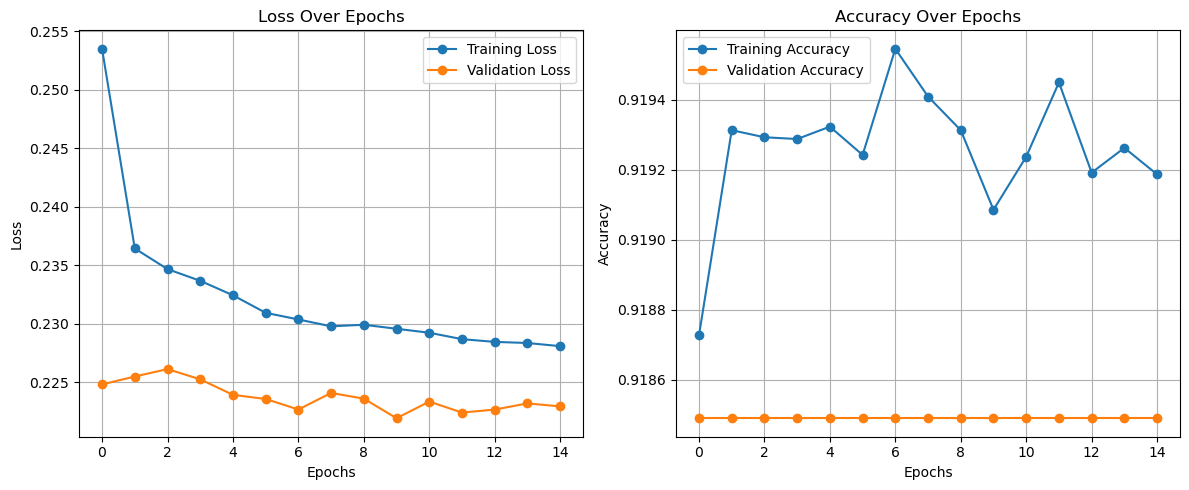

In [52]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
def plot_training_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 5))
    
    # 손실 값 (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # 정확도 값 (Accuracy)
    plt.subplot(1, 2, 2)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()

# 함수 호출: 모델 학습 결과 시각화
plot_training_history(history)
